### Loading data


In [275]:
import numpy as np
import pandas as pd
data = pd.read_csv('Data.csv')
# Loaded the dataset into a pandas DataFrame


### Normalize the data


In [276]:
data = pd.read_csv('Data.csv')
X_mean , Y_mean = data.mean()
X_std , Y_std = data.std()
data['X']= (data['X'] - X_mean)/X_std
shuffled_data = data.sample(frac=1)
print(shuffled_data)


            X         Y
296  1.725992  3.828413
789  1.712142  5.170199
748  1.137389  3.508773
135  0.431065  0.686792
387 -0.181774  0.030744
..        ...       ...
525 -0.372205  0.606695
465 -1.708680 -1.907492
342 -1.320894 -0.168041
986  0.344506  0.853028
90  -0.164463  1.459691

[1000 rows x 2 columns]


### TEST TRAIN SPLIT

In [277]:
split_ratio = 0.8
row_no, col_no = shuffled_data.shape
train_length = int(row_no*split_ratio)

Train = shuffled_data[:train_length]
Test = shuffled_data[train_length:]

X_Train = Train['X'].values
X_Test = Test['X'].values
Y_Test = Test['Y'].values
Y_Train = Train['Y'].values

## Poly Reg

In [278]:
import matplotlib.pyplot as plt
def poly_transform(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.insert(transform_data, i, transformed_feature, axis=1)
    return transform_data

[1.2463029620903727, 1.5051930855432343, 0.8515242103631226, 0.8771256639163088, 0.8586399675019658, 0.8437095017153047, 0.8348799937665251, 0.8636872039954264, 1.5090871260488014e+223]


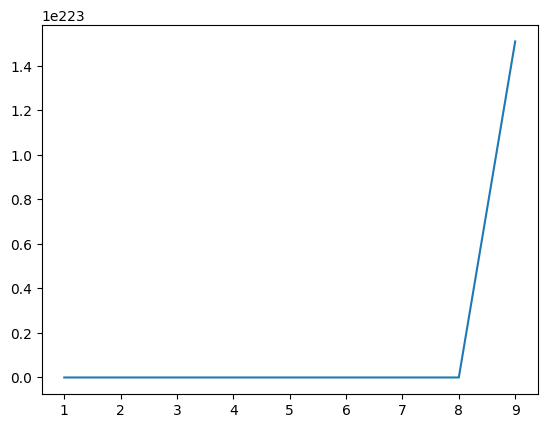

In [345]:
import numpy as np
import matplotlib.pyplot as plt
def bgd_regressor(train, test, learning_rate=0.0022, max_iters=500):
    X = train
    Y = test
    W = np.zeros(train.shape[1])
    n = len(train)
    for _ in range(max_iters):
        Y_pred = np.dot(X, W)
        gradient = np.dot(X.T, Y_pred - Y)
        change = (learning_rate / len(X)) * gradient
        W -= change
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output = []
for i in degrees:
    X_Train_poly = poly_transform(X_Train, i)
    X_Test_poly = poly_transform(X_Test, i)
    W = bgd_regressor(X_Train_poly, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly, W)
    mse = mean_squared_error(Y_Test, Y_Test_pred)
    output.append(mse)

print(output)
plt.plot(degrees, output)
plt.show()

## Task 2
 

### Loading data


In [325]:
import numpy as np
import pandas as pd
data = pd.read_csv('data2.csv')

### Normalize the data

In [326]:
data = pd.read_csv('data2.csv')
Height_mean , Width_mean , Weight_mean = data.mean()
Height_std , Width_std , Weight_std = data.std()
data['Height'] = (data['Height'] - Height_mean)/ Height_std
data['Width'] = (data['Width'] - Width_mean)/ Width_std
data = np.array(data)
np.random.shuffle(data)
print(data)

[[-4.95424837e-01 -1.24034923e+00  5.50000000e+01]
 [-3.93866527e-01  8.82157575e-02  2.50000000e+02]
 [-3.16222132e-01  2.10056740e-01  3.20000000e+02]
 [-4.20650111e-01 -1.62228560e-01  2.18000000e+02]
 [-1.40888969e+00 -1.50568259e+00  1.99000000e+01]
 [ 7.89277279e-01  1.25015401e+00  1.00000000e+03]
 [-7.77142408e-01 -5.29412437e-01  1.20000000e+02]
 [ 4.29518692e-01  1.81664933e+00  1.65000000e+03]
 [-1.04506628e-02  1.04028381e+00  9.50000000e+02]
 [ 5.59237093e-01 -1.08841567e-01  3.00000000e+02]
 [-7.22315386e-01 -5.29412437e-01  1.35000000e+02]
 [ 1.84746214e+00  1.05641854e+00  8.50000000e+02]
 [-6.05662147e-01 -3.51455792e-01  1.45000000e+02]
 [ 2.01868576e+00  1.15850634e+00  9.50000000e+02]
 [ 8.07311870e-01  1.74036525e+00  8.20000000e+02]
 [-1.57647373e+00 -1.92880417e+00  9.90000000e+00]
 [ 8.10274862e-01  4.25028367e-01  4.30000000e+02]
 [-3.23314649e-01  1.29264424e-01  3.00000000e+02]
 [-6.67488364e-01 -5.29412437e-01  1.30000000e+02]
 [ 2.11513466e+00  1.12042361e+

## Split Data

In [346]:
n, m = data.shape
split_ratio = 0.8
Train_2 = data[:int(0.8*n),:]
Test_2 = data[int(0.8*n):,:]
X = Train_2[:,:-1]
Y = Train_2[:,-1]
X_Test = Test_2[:,:-1]
Y_Test = Test_2[:,-1]

(32, 3)


In [328]:
import matplotlib.pyplot as plt
def poly_transform_2(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.concatenate((transform_data,transformed_feature), axis=1)
    return transform_data

## Regression with 0.5

In [329]:
def half_reg(X:np.ndarray, Y:np.ndarray,max_iter = 500 ,penalty = 0.07, learning_rate = 0.00018):
    n, m = X.shape
    W = np.zeros(X.shape[1])
    for _ in range(max_iter):
        Y_pred = np.dot(X,W)
        flag = True
        for iW in W:
            if iW == 0.0:
                flag = False
        if flag == False:
            grad = 1/n*np.dot(X.T, Y_pred-Y)
        else:
            grad = 1/n*np.dot(X.T, Y_pred-Y) + penalty*0.5*W**-0.5
        W -= learning_rate*grad
        learning_rate /=1.000005
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


X_trans = poly_transform_2(X,5)
W_half = half_reg(X_trans,Y)
print(W_half)
y_pred = np.dot(X_trans, W_half)
mse = mean_squared_error(Y, y_pred)
print(mse)
print(y_pred)
print(Y)

[23.23698099  6.86254272 11.0774565  14.6056029  18.63305748  9.31936418
 14.38443231 18.90613243 32.01236269  6.37749563 15.85132381]
123395.86883024112
[  39.94867096   23.75905792   25.75278161   21.40123882   73.91331528
  249.29755121   26.51809129  860.50318758  127.85156207   34.47137114
   25.3598024   612.21386838   22.57940367  851.98081773  751.7282267
   31.522316     64.16478528   24.19791558   24.37916124  974.14048546
  240.35728967  272.78993695   23.90855108   66.35599497   35.60579307
   30.56829254   34.43969006   25.79758593  143.15424844   22.98927329
  124.01647788  987.83296516 1365.69714518  103.89966849  863.23113606
  480.26106396  102.35307574  345.20900881  311.5701822    33.04635646
   22.06041748  192.23185379   46.27166175  124.01647788   23.39466336
   40.65526855   26.82394404   22.8932864    32.98978816   21.03566942
   21.61213532   25.78651033  268.91933275  255.25589896   64.0203529
  473.72913561   23.65721      20.94218189   40.72451531   75.73183

In [343]:
def one_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + l1_penalty*np.sign(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_one_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_transformed = poly_transform_2(X,3)
W_one = one_deg(X_transformed, Y)
W_one
print(W_one)
Y_pred_one_deg = np.dot(X_transformed, W_one)

mse_one = mean_squared_error_one_deg(Y, Y_pred_one_deg)
print(mse_one)

[328.58112533  53.34018185 307.74259087  -2.47400611  69.48164358
   4.52773088 -19.63866065]
22128.003753290723
